<a href="https://colab.research.google.com/github/RamzNN/sapfir/blob/main/%D0%A1%D0%B0%D0%BF%D1%84%D0%B8%D1%80_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка данных

In [2]:
# ==========================
# 0. Импорт необходимых библиотек
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import re

# ==========================
# 1. Чтение файла
# ==========================
# Замените путь на ваш реальный путь к выгрузке
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/выгрузка_вк.xlsx')

# ==========================
# 2. Первичный анализ (EDA)
# ==========================
print("Initial DataFrame shape:", df.shape)
df.info()  # посмотрим общую информацию

Initial DataFrame shape: (52215, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52215 entries, 0 to 52214
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   group_id                 52215 non-null  int64  
 1   name                     52212 non-null  object 
 2   description              39259 non-null  object 
 3   Subscribers Count        51857 non-null  float64
 4   relevance                52215 non-null  bool   
 5   Threat assesment status  52215 non-null  object 
 6   city                     50934 non-null  object 
 7   country                  51337 non-null  object 
 8   tags                     52215 non-null  object 
 9   subcultures              52215 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 3.6+ MB



Количество пропусков по столбцам:
group_id                       0
name                           3
description                12956
Subscribers Count            358
relevance                      0
Threat assesment status        0
city                        1281
country                      878
tags                           0
subcultures                    0
dtype: int64

Распределение 'relevance':
relevance
False    45142
True      7073
Name: count, dtype: int64


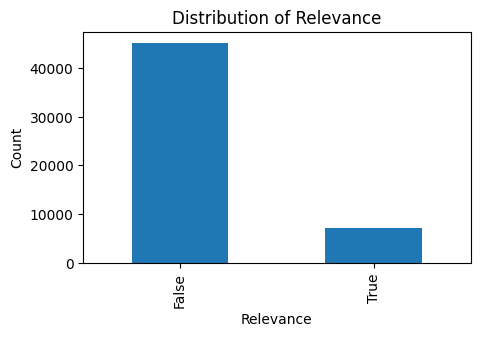

In [3]:
# Проверка пропусков
print("\nКоличество пропусков по столбцам:")
print(df.isnull().sum())

# Распределение целевой переменной 'relevance'
print("\nРаспределение 'relevance':")
print(df['relevance'].value_counts())

# Визуализация
plt.figure(figsize=(5, 3))
df['relevance'].value_counts().plot(kind='bar')
plt.title('Distribution of Relevance')
plt.xlabel('Relevance')
plt.ylabel('Count')
plt.show()

In [4]:
# ==========================
# 3. Обработка пропусков
# ==========================
# Если name пустое — заполним пустой строкой
df['name'] = df['name'].fillna('')
# Если description пустое — заполним пустой строкой
df['description'] = df['description'].fillna('')

# ==========================
# 4. Объединение name + description в единое поле
# ==========================
df['text'] = df['name'] + " " + df['description']
df.head()

,group_id,name,description,Subscribers Count,relevance,Threat assesment status,city,country,tags,subcultures,text
0,259,"Мы ведем ЖЖ (Livejournal, LJ, Живой Журнал)",Данная группа - КЛУБ ВЛАДЕЛЬЦЕВ И ЧИТАТЕЛЕЙ ЖИ...,6388.0,False,safe,Санкт-Петербург,Россия,Движение «Уральская Платформа»,Политический экстремизм,"Мы ведем ЖЖ (Livejournal, LJ, Живой Журнал) Да..."
1,1889,Ценители группы Аквариум,Сообщество посвящено Борису Гребенщикову и гру...,37321.0,False,safe,Санкт-Петербург,Россия,🕸️,Деструктивные квазисубкультуры,Ценители группы Аквариум Сообщество посвящено ...
2,2565,}Ť{ КУЛЬТ ГРУППЫ ПИКНИК }Ť{,"При вступлении в группу, во избежание конфликт...",56055.0,False,safe,Санкт-Петербург,Россия,Правый взгляд,Политический экстремизм,}Ť{ КУЛЬТ ГРУППЫ ПИКНИК }Ť{ При вступлении в г...
3,4537,увк 1693,ШКОЛА № 1693 ИМ. ПЕРВОЙ ДИВИЗИИ НАРОДНОГО ОПОЛ...,2445.0,False,safe,Москва,Россия,Йофик,Аутодеструктивные группы,увк 1693 ШКОЛА № 1693 ИМ. ПЕРВОЙ ДИВИЗИИ НАРОД...
4,7910,"Вожатые ""Зеркального"" идут!","Вожатые ЗЦДЮТ ""Зеркальный""!\n\nДля тех, кто бы...",2845.0,False,safe,Санкт-Петербург,Россия,Хулиганы зеленой улицы,Группы футбольных хулиганов,"Вожатые ""Зеркального"" идут! Вожатые ЗЦДЮТ ""Зер..."


In [5]:
# ==========================
# 5. Очистка текстов (базовая)
# ==========================
def clean_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление не-буквенных символов (оставляем пробелы и буквы а-я, a-z, ё)
    text = re.sub(r'[^a-zа-яё\s]', ' ', text)
    # Сжимаем возможные длинные пробелы до одного
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52215 entries, 0 to 52214
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   group_id                 52215 non-null  int64  
 1   name                     52215 non-null  object 
 2   description              52215 non-null  object 
 3   Subscribers Count        51857 non-null  float64
 4   relevance                52215 non-null  bool   
 5   Threat assesment status  52215 non-null  object 
 6   city                     50934 non-null  object 
 7   country                  51337 non-null  object 
 8   tags                     52215 non-null  object 
 9   subcultures              52215 non-null  object 
 10  text                     52215 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 4.0+ MB


In [6]:
# ==========================
# 6. Удаление дубликатов
# ==========================
# Допустим, хотим удалять дубликаты и по 'text', и по 'group_id'
df.drop_duplicates(subset=['group_id', 'text'], keep='first', inplace=True)

# ==========================
# 7. Итоговый вид датафрейма
# ==========================
print("\nDataFrame shape после объединения, очистки и удаления дубликатов:", df.shape)
df.info()

# Посмотрим, как выглядят первые 5 строк
df.head()



DataFrame shape после объединения, очистки и удаления дубликатов: (52215, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52215 entries, 0 to 52214
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   group_id                 52215 non-null  int64  
 1   name                     52215 non-null  object 
 2   description              52215 non-null  object 
 3   Subscribers Count        51857 non-null  float64
 4   relevance                52215 non-null  bool   
 5   Threat assesment status  52215 non-null  object 
 6   city                     50934 non-null  object 
 7   country                  51337 non-null  object 
 8   tags                     52215 non-null  object 
 9   subcultures              52215 non-null  object 
 10  text                     52215 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 4.0+ MB


,group_id,name,description,Subscribers Count,relevance,Threat assesment status,city,country,tags,subcultures,text
0,259,"Мы ведем ЖЖ (Livejournal, LJ, Живой Журнал)",Данная группа - КЛУБ ВЛАДЕЛЬЦЕВ И ЧИТАТЕЛЕЙ ЖИ...,6388.0,False,safe,Санкт-Петербург,Россия,Движение «Уральская Платформа»,Политический экстремизм,мы ведем жж livejournal lj живой журнал данная...
1,1889,Ценители группы Аквариум,Сообщество посвящено Борису Гребенщикову и гру...,37321.0,False,safe,Санкт-Петербург,Россия,🕸️,Деструктивные квазисубкультуры,ценители группы аквариум сообщество посвящено ...
2,2565,}Ť{ КУЛЬТ ГРУППЫ ПИКНИК }Ť{,"При вступлении в группу, во избежание конфликт...",56055.0,False,safe,Санкт-Петербург,Россия,Правый взгляд,Политический экстремизм,культ группы пикник при вступлении в группу во...
3,4537,увк 1693,ШКОЛА № 1693 ИМ. ПЕРВОЙ ДИВИЗИИ НАРОДНОГО ОПОЛ...,2445.0,False,safe,Москва,Россия,Йофик,Аутодеструктивные группы,увк школа им первой дивизии народного ополчени...
4,7910,"Вожатые ""Зеркального"" идут!","Вожатые ЗЦДЮТ ""Зеркальный""!\n\nДля тех, кто бы...",2845.0,False,safe,Санкт-Петербург,Россия,Хулиганы зеленой улицы,Группы футбольных хулиганов,вожатые зеркального идут вожатые зцдют зеркаль...


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Предположим, что df уже содержит очищенные данные,
# в частности колонки:
#   - 'text'   (объединенные name + description, уже очищенные)
#   - 'relevance' (целевая переменная, bool)

# 1. Определим наш X и y
X = df['text']
y = df['relevance']

# 2. Разделим на train/test.
#    Параметр stratify=y поможет сохранить исходное соотношение
#    релевантных и нерелевантных классов.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Проверки

print("Размеры выборок:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Размеры выборок:
X_train: (41772,)
X_test: (10443,)
y_train: (41772,)
y_test: (10443,)


### Дообучение

In [8]:
!pip install --upgrade pip
!pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
# Пусть после всей предобработки у нас есть:
# X_train, X_test: списки (или Series) строк
# y_train, y_test: список (или Series) 0/1 меток
# Примерно 40k в train, 10k в test, как у вас.

In [9]:
y_train = [int(label) for label in y_train]
y_test = [int(label) for label in y_test]

In [10]:
from datasets import Dataset

train_data = Dataset.from_dict({
    'text': X_train,
    'label': y_train
})

test_data = Dataset.from_dict({
    'text': X_test,
    'label': y_test
})

In [11]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Преобразуем Dataset в обычные списки
X_train_texts = train_data['text']
y_train_labels = train_data['label']

# Разбиваем с учетом стратификации
X_train, X_val, y_train, y_val = train_test_split(
    X_train_texts, y_train_labels, test_size=0.1, random_state=42, stratify=y_train_labels
)

# Создаем новые Dataset
train_data = Dataset.from_dict({'text': X_train, 'label': y_train})
val_data = Dataset.from_dict({'text': X_val, 'label': y_val})


In [18]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "DeepPavlov/rubert-base-cased"  # можно поменять
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Кол-во выходных классов = 2 (бинарная классификация)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Для уверенности проверим, что у нас есть CUDA:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [12]:
def tokenize_function(examples):
    return tokenizer(examples["text"],
                     padding="max_length",  # или "longest", см. что удобнее
                     truncation=True,
                     max_length=128)        # ограничить длину (128 или 256)


In [13]:
train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)
# Или val_data, если у вас отдельный


Map:   0%|          | 0/37594 [00:00<?, ? examples/s]

Map:   0%|          | 0/4178 [00:00<?, ? examples/s]

In [14]:
train_data = train_data.remove_columns(["text"])
val_data = val_data.remove_columns(["text"])

train_data.set_format("torch")
val_data.set_format("torch")

In [15]:
from transformers import TrainingArguments, Trainer
import evaluate

# Подгрузим метрику F1
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)

    # Считаем f1 и accuracy (по желанию можно добавить precision/recall)
    f1_score = f1_metric.compute(references=labels, predictions=predictions, average="binary")["f1"]
    accuracy = accuracy_metric.compute(references=labels, predictions=predictions)["accuracy"]

    return {"f1": f1_score, "accuracy": accuracy}


training_args = TrainingArguments(
    output_dir="bert-finetuned",   # куда сохранять модельные файлы
    evaluation_strategy="epoch",   # оцениваем на валидации после каждой эпохи
    save_strategy="epoch",         # сохраняем чекпоинт после каждой эпохи
    num_train_epochs=3,            # начнем с 3 эпох, можно увеличить
    per_device_train_batch_size=8, # подбирайте по размеру вашей GPU
    per_device_eval_batch_size=16,
    learning_rate=2e-5,            # стандартный lr для fine-tuning BERT
    weight_decay=0.01,             # легкая регуляризация
    logging_steps=100,             # как часто печатать логи
    load_best_model_at_end=True,   # загрузить лучший чекпоинт
    metric_for_best_model="f1",    # выбирать лучший чекпоинт по F1
    greater_is_better=True,        # т.к. чем больше F1, тем лучше
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,      # или val_data, если вы сделали сплит
    compute_metrics=compute_metrics
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ramazan5105 (ramazan5105-freelance) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,F1,Accuracy
1,0.346600,0.338244,0.357923,0.887506
2,0.319200,0.343233,0.486127,0.889181
3,0.308000,0.396489,0.515376,0.890618


TrainOutput(global_step=14100, training_loss=0.32333926721667566, metrics={'train_runtime': 3415.2299, 'train_samples_per_second': 33.023, 'train_steps_per_second': 4.129, 'total_flos': 7418547761402880.0, 'train_loss': 0.32333926721667566, 'epoch': 3.0})

In [16]:
test_data = Dataset.from_dict({
    'text': X_test,
    'label': y_test
})

test_data = test_data.map(tokenize_function, batched=True)
test_data = test_data.remove_columns(["text"])
test_data.set_format("torch")

Map:   0%|          | 0/10443 [00:00<?, ? examples/s]

In [20]:
metrics = trainer.evaluate(test_data)
print(metrics)  # dict с f1, accuracy, eval_loss и т.д.

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ramazan5105 (ramazan5105-freelance) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 0.40421658754348755, 'eval_model_preparation_time': 0.003, 'eval_f1': 0.4956195244055069, 'eval_accuracy': 0.8842286699224361, 'eval_runtime': 75.9467, 'eval_samples_per_second': 137.504, 'eval_steps_per_second': 8.598}


API WandB- b06322dfe8c9f8b6847b4e0eed3503937e2a1809

#### Сохранение модели

In [ ]:
# model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model')
# tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model')

('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model/tokenizer.json')

#### Загрузка модели

```
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model')
tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model')
```


In [19]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer

# model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model')
# tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер "Сапфир"/bert_model')

### Подбор порога

In [21]:
predictions = trainer.predict(test_data)
logits = predictions.predictions  # Это массив размером [num_samples, 2], т.к. 2 класса
labels = predictions.label_ids


In [22]:
import torch
import numpy as np

logits_tensor = torch.tensor(logits)  # превращаем logits в тензор
probabilities = torch.softmax(logits_tensor, dim=1)  # softmax по второму измерению
y_proba = probabilities[:, 1].numpy()  # вероятности класса 1


In [31]:
from sklearn.metrics import confusion_matrix

thresholds = np.arange(0.0, 1.01, 0.01)

desired_recall = 0.98  # пример: стремимся не пропустить 98% True
min_tnr = 0.15         # хотим отсечь хотя бы 15% False

feasible_thresholds = []

# labels - это "настоящие" классы (0/1) из test_data
y_true = labels

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Recall (True) = TP / (TP + FN)
    recall_true = tp / (tp + fn) if (tp + fn) > 0 else 0

    # TNR (False) = TN / (TN + FP)
    # (доля "false", предсказанных как false, то есть "не пропущенных")
    tnr_false = tn / (tn + fp) if (tn + fp) > 0 else 0

    if recall_true >= desired_recall and tnr_false >= min_tnr:
        feasible_thresholds.append((t, recall_true, tnr_false))

if len(feasible_thresholds) == 0:
    print(f"Не нашлось порога, при котором Recall(True) ≥ {desired_recall} и TNR ≥ {min_tnr}")
else:
    print("Пороги, где одновременно достигаются нужные ограничения:")
    for (th, rec, tnr) in feasible_thresholds:
        print(f"Threshold={th:.2f}, Recall(True)={rec:.3f}, TNR(False)={tnr:.3f}")


Пороги, где одновременно достигаются нужные ограничения:
Threshold=0.01, Recall(True)=0.983, TNR(False)=0.151


### Попробуем добавить CatBoost

In [32]:
!pip install catboost
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 39.2 MB/s eta 0:00:00


In [37]:
model_path = "/content/drive/MyDrive/Colab Notebooks/Работа/Платформа-парсер \"Сапфир\"/bert_model"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model_cls = AutoModelForSequenceClassification.from_pretrained(model_path, output_hidden_states=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_cls.to(device)
model_cls.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [33]:
import numpy as np

def get_cls_embeddings(model, tokenizer, texts, device="cpu", batch_size=16, max_length=128):
    """
    Для каждого текста в `texts` возвращаем эмбеддинг CLS-токена
    из последнего слоя hidden_states модели BERT.
    """
    all_embeddings = []

    # Отключим градиенты (inference)
    model.eval()
    with torch.no_grad():
        # Батчами обрабатываем тексты
        for start_idx in range(0, len(texts), batch_size):
            batch_texts = texts[start_idx:start_idx+batch_size]

            enc = tokenizer(batch_texts,
                            padding=True,
                            truncation=True,
                            max_length=max_length,
                            return_tensors="pt")
            # Переносим на GPU/CPU
            for k, v in enc.items():
                enc[k] = v.to(device)

            outputs = model(**enc, output_hidden_states=True)
            # hidden_states - список тензоров по слоям: [layer_0, layer_1, ..., layer_n]
            # нас интересует последний слой hidden_states[-1]
            hidden = outputs.hidden_states[-1]  # [batch_size, seq_len, hidden_dim]
            # CLS-токен — это позиция 0
            cls_emb = hidden[:, 0, :]  # [batch_size, hidden_dim]

            cls_emb = cls_emb.cpu().numpy()  # переводим на CPU + в numpy
            all_embeddings.append(cls_emb)

    # Склеим все батчи
    all_embeddings = np.concatenate(all_embeddings, axis=0)
    return all_embeddings

In [38]:
# X_train, y_train, X_test, y_test
# (если bool, переведите в int 0/1)

X_train = list(X_train)  # или np.array, главное — итерабельное
X_test = list(X_test)


In [39]:
train_emb = get_cls_embeddings(model_cls, tokenizer, X_train, device=device, batch_size=16, max_length=128)
test_emb = get_cls_embeddings(model_cls, tokenizer, X_test, device=device, batch_size=16, max_length=128)

# Проверим размеры:
print("Train embeddings shape:", train_emb.shape)  # (num_train, 768)
print("Test embeddings shape:", test_emb.shape)    # (num_test, 768)


Train embeddings shape: (37594, 768)
Test embeddings shape: (10443, 768)


In [47]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

model_cat = CatBoostClassifier(
    iterations=300,
    # Пробуйте eval_metric='F1',
    auto_class_weights='Balanced',
    eval_metric="F1",
    random_state=42,
    verbose=50
)

model_cat.fit(
    train_emb, y_train,
    eval_set=(test_emb, y_test)
)

# Предсказания
y_pred = model_cat.predict(test_emb)

print("Classification Report (CatBoost on BERT-embeddings):")
print(classification_report(y_test, y_pred, digits=4))

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


Learning rate set to 0.131044
0:	learn: 0.8376641	test: 0.7146302	best: 0.7146302 (0)	total: 366ms	remaining: 1m 49s
50:	learn: 0.8397005	test: 0.7117660	best: 0.7153085 (4)	total: 15s	remaining: 1m 13s
100:	learn: 0.8509762	test: 0.6977389	best: 0.7153085 (4)	total: 28.6s	remaining: 56.3s
150:	learn: 0.8645965	test: 0.7022196	best: 0.7153085 (4)	total: 41.9s	remaining: 41.3s
200:	learn: 0.8831043	test: 0.6949349	best: 0.7153085 (4)	total: 55.3s	remaining: 27.2s
250:	learn: 0.9022150	test: 0.6831956	best: 0.7153085 (4)	total: 1m 8s	remaining: 13.4s
299:	learn: 0.9165091	test: 0.6838452	best: 0.7153085 (4)	total: 1m 21s	remaining: 0us

bestTest = 0.7153084527
bestIteration = 4

Shrink model to first 5 iterations.
Classification Report (CatBoost on BERT-embeddings):
              precision    recall  f1-score   support

           0     0.9380    0.8398    0.8862      9028
           1     0.3873    0.6459    0.4842      1415

    accuracy                         0.8136     10443
   macr

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_prob = model_cat.predict_proba(test_emb)[:, 1]  # вероятность класса 1
thresholds = np.arange(0.0, 1.01, 0.01)

best_f1 = 0
best_t = 0
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    if f1_t > best_f1:
        best_f1 = f1_t
        best_t = t

print("Best threshold for max F1:", best_t, "F1:", best_f1)


Best threshold for max F1: 0.65 F1: 0.5122935779816514


In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Пусть ваша модель - model_cat
# y_test - истинные метки (0/1), test_emb - признаки (эмбеддинги).
# Сначала получим вероятности для класса 1:
y_proba = model_cat.predict_proba(test_emb)[:, 1]

# Шаг 1. Определяем перебор порогов
thresholds = np.arange(0.0, 1.01, 0.01)

# Ваши условия
desired_recall = 0.90
min_tnr = 0.25

feasible_thresholds = []

for t in thresholds:
    # Формируем предсказания по заданному порогу
    y_pred = (y_proba >= t).astype(int)

    # Вычислим TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Recall для класса True
    recall_true = tp / (tp + fn) if (tp + fn) > 0 else 0

    # TNR (True Negative Rate) для класса False
    # TNR = TN / (TN + FP)
    tnr_false = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Если оба условия выполнены, добавляем порог в список
    if recall_true >= desired_recall and tnr_false >= min_tnr:
        feasible_thresholds.append((t, recall_true, tnr_false))

# Выводим результаты
if len(feasible_thresholds) == 0:
    print(f"Не нашлось порога, при котором Recall(True) ≥ {desired_recall} и TNR(False) ≥ {min_tnr}")
else:
    print("Пороги, где одновременно достигаются нужные ограничения:")
    for (th, rec, tnr) in feasible_thresholds:
        print(f"Threshold={th:.2f}, Recall(True)={rec:.3f}, TNR(False)={tnr:.3f}")


Пороги, где одновременно достигаются нужные ограничения:
Threshold=0.10, Recall(True)=0.940, TNR(False)=0.338
Threshold=0.11, Recall(True)=0.917, TNR(False)=0.416


In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Пусть ваша модель - model_cat
# y_test - истинные метки (0/1), test_emb - признаки (эмбеддинги).
# Сначала получим вероятности для класса 1:
y_proba = model_cat.predict_proba(test_emb)[:, 1]

# Шаг 1. Определяем перебор порогов
thresholds = np.arange(0.0, 1.01, 0.01)

# Ваши условия
desired_recall = 0.90
min_tnr = 0.25

feasible_thresholds = []

for t in thresholds:
    # Формируем предсказания по заданному порогу
    y_pred = (y_proba >= t).astype(int)

    # Вычислим TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Recall для класса True
    recall_true = tp / (tp + fn) if (tp + fn) > 0 else 0

    # TNR (True Negative Rate) для класса False
    # TNR = TN / (TN + FP)
    tnr_false = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Если оба условия выполнены, добавляем порог в список
    if recall_true >= desired_recall and tnr_false >= min_tnr:
        feasible_thresholds.append((t, recall_true, tnr_false))

# Выводим результаты
if len(feasible_thresholds) == 0:
    print(f"Не нашлось порога, при котором Recall(True) ≥ {desired_recall} и TNR(False) ≥ {min_tnr}")
else:
    print("Пороги, где одновременно достигаются нужные ограничения:")
    for (th, rec, tnr) in feasible_thresholds:
        print(f"Threshold={th:.2f}, Recall(True)={rec:.3f}, TNR(False)={tnr:.3f}")


Пороги, где одновременно достигаются нужные ограничения:
Threshold=0.26, Recall(True)=0.939, TNR(False)=0.331
Threshold=0.27, Recall(True)=0.926, TNR(False)=0.387
Threshold=0.28, Recall(True)=0.914, TNR(False)=0.423
Threshold=0.29, Recall(True)=0.902, TNR(False)=0.461
